<a href="https://colab.research.google.com/github/snghynn/handsonml/blob/main/week7_Pytorch_linear_regression_1018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Session 2: Linear regression

In [1]:
import torch
import numpy as np

## 1. Data Generation:


Let us create the following expressions:


$b=-1,w=2$

$\hat{y}=wx+b$


First, define the parameters:


In [2]:
import torch
w0 = torch.tensor(2.0)
b0 = torch.tensor(-1.0)

In [3]:
torch.manual_seed(2021)
X = torch.arange(-3,3, 0.3).view(-1, 1)  # araange: 값을 생성하는 데 사용하는 함수
'''
torch.arange(start,end,step)
'''
f = w0*X + b0
print(X.shape, f.shape)

torch.Size([20, 1]) torch.Size([20, 1])


In [4]:
Y = f + torch.randn(f.shape)

In [5]:
print(X.shape, Y.shape)

torch.Size([20, 1]) torch.Size([20, 1])


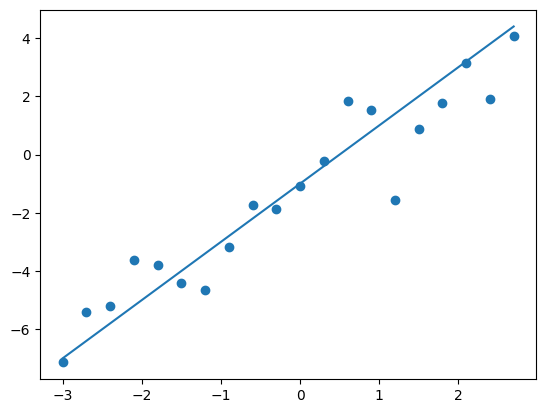

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X.numpy(),Y.numpy())
plt.plot(X.numpy(),f.numpy()) # 목적: 이 선 찾아내기

## 2. Linear regression model

You are given X and Y.

Your goal is to find the best linear model to explain the relation between X and Y by minimizing the following

$Loss(w, b)=\sum\limits_{i=1}^{n}(Y_i-Yhat_i)^2$

where

$Yhat_i:=X_i*w +b$.

In [7]:
def forward(x):
  return x*w+b # Yhat을 만드는 함수, X.shape: [n,1], w.shape:[1,1] , b.shape [1,1] <- 여기서 n=20
  # *를 써도, @를 써도 상관 없음
'''
X[n,1] @ w[1,1] + b[1,]
'''
def loss_ftn(yhat, y):
  return torch.mean((yhat-y)**2) # yhat, y 모두 [20,1]

torch.manual_seed(2023)
# w,b의 초기점
# w와 b는 param 1개이나, X*w를 할건데 이 차원이 [n,1]이 되도록 w를 [1,1]로 shape을 만들어줌
w = torch.tensor(torch.randn([1,1]), requires_grad=True)
b = torch.tensor(torch.randn([1,1]), requires_grad=True)
# X*w 의 차원이 [n,1]이 되도록
print(w,b)

tensor([[-1.2075]], requires_grad=True) tensor([[0.5493]], requires_grad=True)


<ipython-input-7-c825198eeb7c>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(torch.randn([1,1]), requires_grad=True)
<ipython-input-7-c825198eeb7c>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.randn([1,1]), requires_grad=True)


In [ ]:
# batch 없이 진행
history = []
lr = 0.1
epochs = 100

for i in range(epochs):
    yhat = forward(X) #yhat: [20,1]
    loss = loss_ftn(yhat, Y) # MSE
    # history.append(loss.item())가 여기에 들어가도 됨
    # 미분
    loss.backward()

    #gradient descent
    w.data = w.data - lr * w.grad # MSE를 최소화하는 방향으로 gradient descent
    b.data = b.data - lr * b.grad

    # 미분값 비워줌.  gradient accumulate를 막아줌
    w.grad = None #  w.grad.data.zero_() 와 같음
    b.grad = None

    history.append(loss.item())

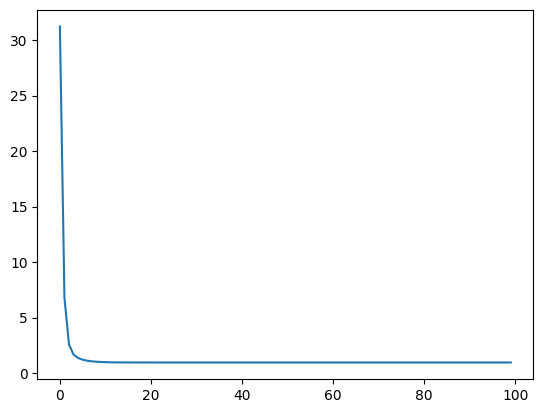

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history)

In [ ]:
w = torch.tensor(torch.randn([1,1]), requires_grad=True)
b = torch.tensor(torch.randn([1,1]), requires_grad=True)
history=[]
lr=0.1
for epoch in range(100):
  Yhat = forward(X)
  loss = loss_ftn(Yhat,Y)
  history.append(loss.item())
  loss.backward()
  w.data = w.data-lr*w.grad.data
  b.data = b.data-lr*b.grad.data
  w.grad = None
  b.grad = None

<ipython-input-40-584f6daf8fe4>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(torch.randn([1,1]), requires_grad=True)
<ipython-input-40-584f6daf8fe4>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.randn([1,1]), requires_grad=True)


In [ ]:
print(w, b) # 답인 (2,-1)에 근사함

tensor([[1.7149]], requires_grad=True) tensor([[-1.1823]], requires_grad=True)


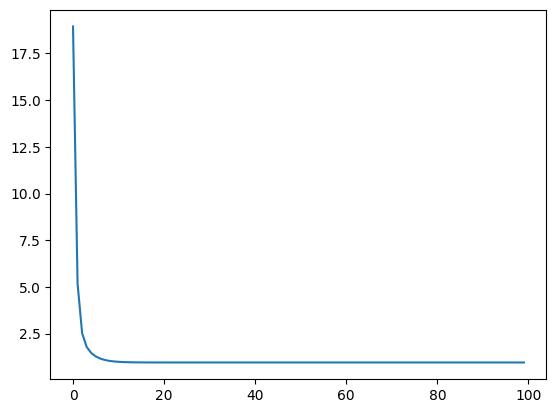

In [ ]:
plt.plot(history)

### 2.1 Further consideration: `torch.optim.SGD`

> **w와 b에 대한 자동 update**

Using the following optimizer
`my_optimizer = torch.optim.SGD([w,b], lr=0.1)`, we can excute a gradient descent one time by the following command:

1> Gradient descent

`my_optimizer.step()`

which is equivalent with

` w.data = w.data-lr*w.grad.data`

`b.data = b.data-lr*b.grad.data`

2> Making zero-grad before differentiation

`my_optimizer.zero_grad()`

which is equivalent with

`w.grad = None`

`b.grad = None`

### Exercise 2.1.1

Train the same model above using `torch.optim.SGD` function.

#### 데이터 초기화 및 yhat 추정 모델 학습을 위한 optimizer 생성

```# model
## 주의사항

# backward()를 한뒤 바로 grad를 지우면 update할 때 사용될 grad가 사라지므로 grad는 항상 w,b를 update한 후에 지워줘야함!

history=[]
lr=0.1
for epoch in range(100):
  Yhat = forward(X)
  loss = loss_ftn(Yhat,Y)
  history.append(loss.item())
  loss.backward()
  w.grad = None
  b.grad = None
  w.data = w.data-lr*w.grad.data
  b.data = b.data-lr*b.grad.data
  ```


In [8]:
def forward(x):
    return x@w + b

def loss_ftn(yhat, y):
    return torch.mean( (y-yhat)**2)

# 초기값 생셩
w = torch.tensor(torch.randn([1,1]), requires_grad=True)
b = torch.tensor(torch.randn([1,1]), requires_grad=True)

# optimizer에 parameter 명확하게 알려줘야 함: w,b
optimizer = torch.optim.SGD([w,b], lr=0.1)

<ipython-input-8-c365e2abd181>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(torch.randn([1,1]), requires_grad=True)
<ipython-input-8-c365e2abd181>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.randn([1,1]), requires_grad=True)


In [9]:
## model

history = []
lr = 0.1
epochs = 100

for i in range(epochs):
  Yhat = forward(X)
  loss = loss_ftn(Yhat,Y)
  ## 초기화를 위에서 시켜도 됨
  # w.grad.data = None
  # b.grad.data = None
  '''optimizer.zero_grad() 가능 '''

  history.append(loss.item())
  loss.backward()

  ## Gradient Descent
  #w.data = w.data-lr*w.grad.data
  #b.data = b.data-lr*b.grad.data
  optimizer.step() # loss function을 정의한 후에 해줘야 함
### backward() 후 step()이 일어나야 함. zero_grad는 backward() 앞이나 step() 후에 가능
  optimizer.zero_grad()

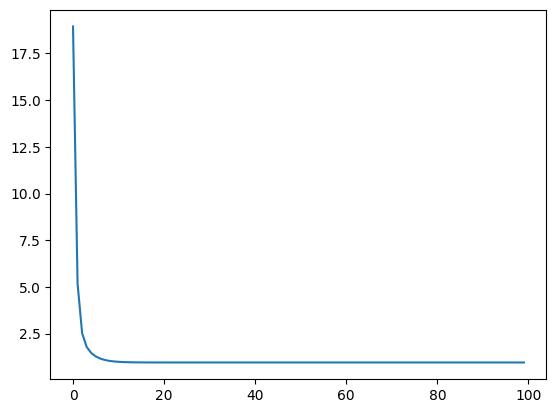

In [10]:
plt.plot(history)

# 3. Stochastic Gradient Descent (SGD) using Dataset and DataLoader

In [ ]:
# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

Now, for educational purpose, let's include intercept in the model matrix `X`. For this, you can use the following command.

`XX`

1 x1

1 x2

1 x3

...

1 xn

`W`

w0

w1

Yhat = XX @ W  #(= X@w + b0)

`XX @ W` =

w0 + w1*x1

w0 + w1*x2

w0 + w1*x3

...

w0 + w1*xn

Convert X to Xnew(design matrix)    
X    = [[x1,x2,x3,...,xn]] nx1     
Now, add coefficient term  
Xnew = [[1,1,...,1],[x1,x2,...,xn]] nx2 (design matrix)  

So, w = [ [w1]] -> w = [[w0],[w1]] 2x2   
* in this case, we don't need to have b:[1,] (i.e without extra coeff)

In [ ]:
X.shape[0]

20

In [ ]:
X

tensor([[-3.0000e+00],
        [-2.7000e+00],
        [-2.4000e+00],
        [-2.1000e+00],
        [-1.8000e+00],
        [-1.5000e+00],
        [-1.2000e+00],
        [-9.0000e-01],
        [-6.0000e-01],
        [-3.0000e-01],
        [-2.3842e-08],
        [ 3.0000e-01],
        [ 6.0000e-01],
        [ 9.0000e-01],
        [ 1.2000e+00],
        [ 1.5000e+00],
        [ 1.8000e+00],
        [ 2.1000e+00],
        [ 2.4000e+00],
        [ 2.7000e+00]])

In [ ]:
ones = torch.ones([X.shape[0],1]) # matrix에 1을 추가
XX = torch.concat([ones, X], axis=1)
print(XX.shape)
print(XX) # 지금의 X는 1이 추가된 모양

torch.Size([20, 2])
tensor([[ 1.0000e+00, -3.0000e+00],
        [ 1.0000e+00, -2.7000e+00],
        [ 1.0000e+00, -2.4000e+00],
        [ 1.0000e+00, -2.1000e+00],
        [ 1.0000e+00, -1.8000e+00],
        [ 1.0000e+00, -1.5000e+00],
        [ 1.0000e+00, -1.2000e+00],
        [ 1.0000e+00, -9.0000e-01],
        [ 1.0000e+00, -6.0000e-01],
        [ 1.0000e+00, -3.0000e-01],
        [ 1.0000e+00, -2.3842e-08],
        [ 1.0000e+00,  3.0000e-01],
        [ 1.0000e+00,  6.0000e-01],
        [ 1.0000e+00,  9.0000e-01],
        [ 1.0000e+00,  1.2000e+00],
        [ 1.0000e+00,  1.5000e+00],
        [ 1.0000e+00,  1.8000e+00],
        [ 1.0000e+00,  2.1000e+00],
        [ 1.0000e+00,  2.4000e+00],
        [ 1.0000e+00,  2.7000e+00]])


In [ ]:
dataset = TensorDataset(XX,Y)

In [ ]:
trainloader = DataLoader(dataset = dataset, batch_size=5, shuffle=True)
# data size=20, batch_size=5 -> grad. descent는 4번 일어남

In [ ]:
'''
cf) 이전에는:
X[n,1] @ beta1[1,1] + beta0[1,1]

지금:
xx[n,2] @ beta[2,1]
'''

beta = torch.tensor(torch.randn([2,1]), requires_grad=True)
def model(xx):
    return xx @ beta # 목적) 이 beta 찾아내기!!
'''
위는 model = torch.nn.Linear(2, 1, bias=False) 와 동일
# model(x): forward 계산
# model.parameters(): parameter 보여줌, step ft과 같이 working
# model.state_dict(): parameter의 이름과 값 보여줌
if bias=True -> W:[k1,k2], b=[k2]  #k1: 설명변수 개수, k2:y의 차원(거의 1)
model(xx) = xx@W + b
'''
def loss_ftn(yhat, y):
  return torch.mean((yhat-y)**2)
  # torch.sum((yhat-y)**2)/20
# prior: my_optimizer = torch.optim.SGD([w,b], lr=0.1)
my_optimizer = torch.optim.SGD([beta], lr=0.01) # model=torch.nn.Linear()하는 경우, [beta] 대신 model.parameters()
#optim.SGD(model.parameters(), lr=0.1)

<ipython-input-77-b9d4279ced79>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([2,1]), requires_grad=True)


In [ ]:
epochs=100 # gradient descent는 100*4만큼(4=20/5)
history=[]
n=len(XX) # n=20
# 전체 데이터를 갖고 epoch 돌리기
# 문제: 데이터의 수가 너무 많으면 한번 학습시 시간이 너무 오래걸리고 안돌아갈 수도 있음 -> trainloader로 데이터를 묶음으로 나눠 학습시키기!
'''for epoch in range(epochs):
  LOSS_sum = 0
  yhat = model(xx)
  Loss = loss_ftn(yhat, yy)
  history.append(Loss.item())
  loss.backward()
  my_optimizer.step()
  my_optimizer.zero_grad()'''

for epoch in range(epochs):
    LOSS_sum = 0
    # total data # = 20 but batch_size = 5, so training W with chosen 5 data
    for xx, yy in trainloader: # x.shape: 5x2 mat # y, yhat.shape: 5x1 mat
        yhat = model(xx)
        loss = loss_ftn(yhat, yy)
        # history 출력할 LOSS_sum 생성
        LOSS_sum = LOSS_sum + loss.item() * len(yy) # len(yy): 마지막 바퀴수

        loss.backward()

        my_optimizer.step()
        my_optimizer.zero_grad()
    history.append(LOSS_sum/n) # epoch_loss is total loss of one trained model, so we divide epoch_loss over n to get total mean of loss


Here, make sure you understand how `loss` is defined.

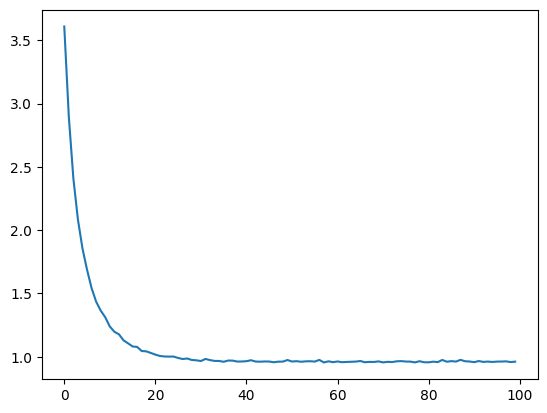

In [ ]:
#  Reason of sloppy graph over the history: In fact, trainloader divided into 5 data set .
# Then, while training the entire data, epoch_loss changes as w and b continue to be updated and epoch_loss add loss calculated by the updated w, b.
# So it looks like a sloppy graph.
plt.plot(history)

In [ ]:
## model2)
# 밑에부분 올라옴
dataset = TensorDataset(XX,Y)
trainloader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)
class MyLinear(torch.nn.Module): # bias 없고, weight만 있음
  def __init__(self, input_size, output_size):
    super().__init__()
    self.weight = torch.nn.Parameter(torch.randn(input_size,output_size))
    # self.bias = torch.nn.Parameter(torch.randn([output_size]))
  def forward(self,x):
    temp = x @ self.weight # + self.bias
    return temp

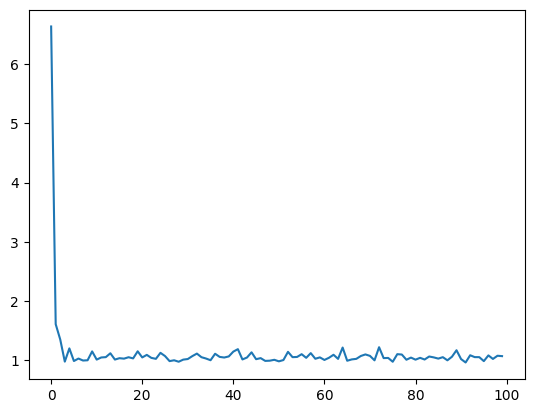

In [ ]:
model = MyLinear(2, 1)

def criterion(yhat,y):
  return torch.mean((yhat-y)**2)
my_optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


epochs=100 # gradient descent는 100*4만큼(4=20/5)
history=[]
n=len(XX) # n=20


for epoch in range(epochs):
    LOSS_sum = 0
    for xx, yy in trainloader: # x.shape: 5x2 mat # y, yhat.shape: 5x1 mat
        yhat = model(xx)
        loss = criterion(yhat, yy)
        # history 출력할 LOSS_sum 생성
        LOSS_sum = LOSS_sum + loss * len(yy) # len(yy): 마지막 바퀴수
        my_optimizer.zero_grad()
        loss.backward()
        my_optimizer.step()
    history.append(LOSS_sum.item()/n)

plt.plot(history)

In [ ]:
Yhat = model(XX)
torch.mean((Yhat-Y)**2)

tensor(0.9980, grad_fn=<MeanBackward0>)

In [ ]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-1.1130],
                      [ 1.8334]]))])

In [ ]:
# cf) X를 넣는 경우
dataset = TensorDataset(X,Y)
trainloader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)
from torch import optim

In [ ]:
## model1)
# model(x) = x[n,1] @ W[1,1] + b[1,]
model = torch.nn.Linear(1,1,bias=True)
# def model(xx):
#   return xx@beta


In [ ]:
XX

tensor([[ 1.0000e+00, -3.0000e+00],
        [ 1.0000e+00, -2.7000e+00],
        [ 1.0000e+00, -2.4000e+00],
        [ 1.0000e+00, -2.1000e+00],
        [ 1.0000e+00, -1.8000e+00],
        [ 1.0000e+00, -1.5000e+00],
        [ 1.0000e+00, -1.2000e+00],
        [ 1.0000e+00, -9.0000e-01],
        [ 1.0000e+00, -6.0000e-01],
        [ 1.0000e+00, -3.0000e-01],
        [ 1.0000e+00, -2.3842e-08],
        [ 1.0000e+00,  3.0000e-01],
        [ 1.0000e+00,  6.0000e-01],
        [ 1.0000e+00,  9.0000e-01],
        [ 1.0000e+00,  1.2000e+00],
        [ 1.0000e+00,  1.5000e+00],
        [ 1.0000e+00,  1.8000e+00],
        [ 1.0000e+00,  2.1000e+00],
        [ 1.0000e+00,  2.4000e+00],
        [ 1.0000e+00,  2.7000e+00]])

### Prediction of the model

For $x=3.0$ our prediction for $y$ can be calculated as
```
xx=torch.tensor([[1, 3.0]])
model(xx)
```

calculate $\hat{y}$ when x = [3.0]

In [ ]:
# sol1)
X_new = torch.tensor([[1, 3.0]])
model(X_new)

In [ ]:
# sol2)
X_new = torch.tensor([[1,3.0]])
X_new@beta

In [ ]:
# 이전에 my_optimizer.step()을 이용해 학습이 완료된 W가 저장되었으므로,
# 즉 Yhat이 Y를 잘 추정하는 W가 계산되어 저장되어 있으므로
# 위의 model에 x_new를 넣지 않고 x_new에 W를 곱해 Yhat을 추정해도 됨.
X_new @ beta

### 3.1 Pytorch function of `model`

> *1) bias = False*


```
def model(x):
    return x @ beta
```
` 여기서 x:[n,2], beta:[2,1], 즉 beta:[input차원, output차원]`

can be replaced by
```
model = torch.nn.Linear(2, 1, bias=False)
```

where `2` means the dimension of the input. In our case, input `XX` has two columns so that we have the dimension of the input is `2`.


```
torch.nn.Linear(input size, output size, bias=False)
```


> *2) bias = True*


 ```
def model(x):
    return x@W + b
```
`여기서 W:[input, output], b:[output]`
```
model = torch.nn.Linear(input, output, bias=True)
```

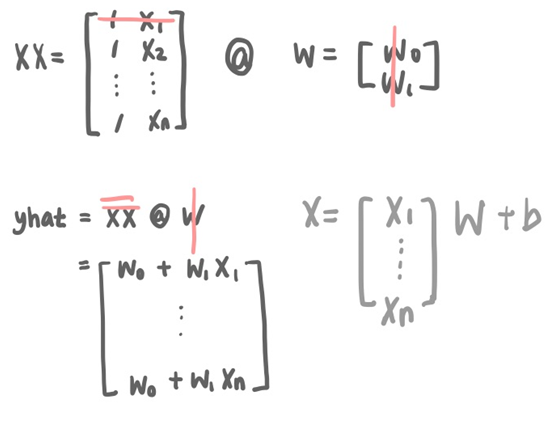

1)
```
yhat=model(XX)
def model(x):
  return x@W
W = torch.tensr(torch.randn([2,1]), requires_grad=True)
```

2)
```
yhat = model(XX)
model = torch.nn.Linear(2,1,bias=False)
```

3) `bias=True`라고 하게 될 경우, X에 1차원짜리 bias(11...1)이 생김
```
yhat = model(X)
model = torch.nn.Linear(1,1,bias=True)
```

### 3.1.1 Example:

The following code the rewriting of the above training procedure where model is defined by `torch.nn.Linear`.

In [ ]:
model = torch.nn.Linear(2,1, bias = False)
model.state_dict() # model 안의 parameter 보여주기

**예측의 유의사항**   
model.state_dict의 weight의 shape을 보면 2x1이 아닌 1x2이다.  
그러므로 model을 사용하지 않고 직접 예측을 할 땐 W의 shape이 2x1로 해야 XX shape nx2와 계산 가능해지므로,
W의 shape을 바꾸어 예측해야한다.

In [ ]:
xxx = torch.tensor([[1.0,3.0]])
model(xxx)

In [ ]:
# mtd 1) 차원을 transpose 해줌
xxx @ model.weight.T

In [ ]:
# mtd 2)
xxx @ model.weight.reshape(-1,1)

In [ ]:
### bias=True -> weight, bias 파라미터가 있음
model = torch.nn.Linear(2,1, bias = True)
model.state_dict() # model 안의 parameter 보여주기

In [ ]:
xxx = torch.tensor([[1.0,3.0]])
model(xxx)

In [ ]:
xxx@model.weight.T + model.bias

In [ ]:
model.parameters() # w, b를 나타냄

<generator object Module.parameters at 0x7b2cd2d5f1b0>

In [ ]:
'''
W = torch.tensor(torch.randn([2,1]), requires_grad = True)
def model(x):
    return x @ W
'''
#와 같은 행동을 의미하는 model
model = torch.nn.Linear(2,1, bias = False) # x@model.parameters()

def loss_ftn(yhat, y):
    return torch.mean((yhat-y)**2)

my_optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
epochs=100
history=[]
n=len(XX)

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = loss_ftn(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)

    loss.backward()

    my_optimizer.step()
    my_optimizer.zero_grad()

  history.append(LOSS_sum.item()/n)

RuntimeError: ignored

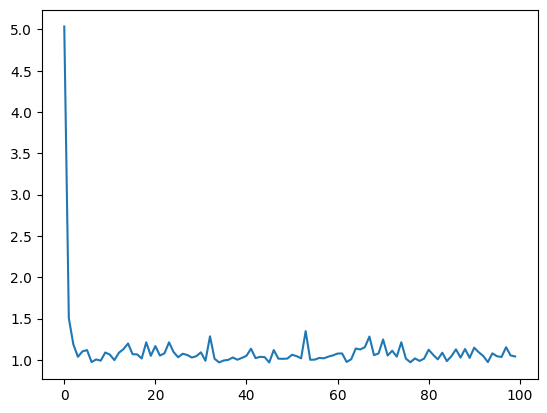

In [ ]:
plt.plot(history)

In [ ]:
# x = 3.0일 때의 예측치
xxx = torch.tensor([[1, 3.0]])
model(xxx) # 4랑 비슷한 값이 나옴

tensor([[4.2240]], grad_fn=<MmBackward0>)

In [ ]:
## without model
# step1. check model's parameter using model.state_dict()
model.state_dict() # 음, 이건 weight군! 모델에 weight밖에 없군!

OrderedDict([('weight', tensor([[-1.1951,  1.8064]]))])

In [ ]:
W = model.weight.T
xxx @ W

tensor([[4.2240]], grad_fn=<MmBackward0>)

The following command is important command to check the parameters of the model in `torch.nn.Linear`, and identify the name of each parameter. In this example, we can use parameters using the following commands

```
print(model.weight, model.bias)
```

If you want to do gradient descent without using `torch.optimizer.SGD`, you can use the following commands:

```
model.weight.data = model.weight.data - lr * model.weight.grad

model.bias.data = model.bias.data - lr * model.bias.grad

```

In [ ]:
epochs=100
history=[]
n=len(XX)
lr = 0.01
'''
W = torch.tensor(torch.randn([2,1]), requires_grad = True)
def model(x):
    return x @ W
'''
#와 같은 행동을 의미하는 model
model = torch.nn.Linear(2,1, bias = False)

def loss_ftn(yhat, y):
    return torch.mean((yhat-y)**2)

#my_optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)


for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = loss_ftn(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)

    loss.backward()

    # my_optimizer.step()
    model.weight.data = model.weight.data - lr * model.weight.grad

    #my_optimizer.zero_grad()
    model.weight.grad = None

  history.append(LOSS_sum.item()/n)


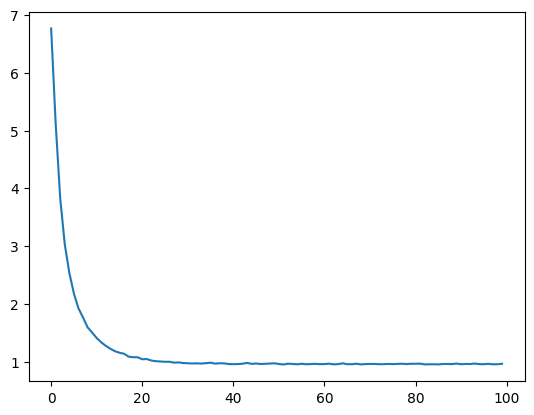

In [ ]:
plt.plot(history)

In [ ]:
epochs=100
history=[]
n=len(XX)
lr = 0.01
# 위와 동일
model = torch.nn.Linear(2,1, bias = False)
def loss_ftn(yhat, y):
    return torch.mean((yhat-y)**2)

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = loss_ftn(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    #my_optimizer.zero_grad()
    model.weight.grad = None
    loss.backward()
    # my_optimizer.step()
    model.weight.data = model.weight.data - lr * model.weight.grad
  history.append(LOSS_sum.item()/n)

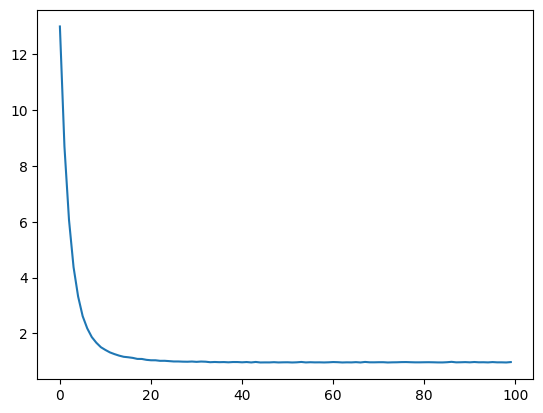

In [ ]:
plt.plot(history)

predict when x = 3.0

In [ ]:
# predict yhat when x = 3.0
xxx = torch.tensor([[1, 3.0]])
model(xxx)

tensor([[3.9709]], grad_fn=<MmBackward0>)

## Exercise 3.1.2:

Repeat the above training procedure with

   1> batch size equals 4

   2> Use `forward = torch.nn.Linear(1, 1, bias=True)` Here, you may use `X` instead of `XX` redefine `trainloader`

  

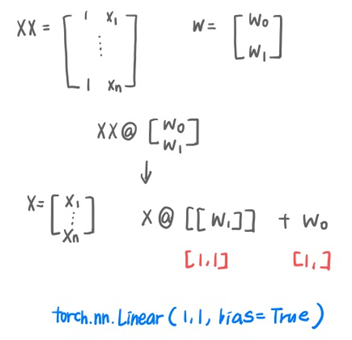

In [ ]:
X.shape # [n,1]의 형태

torch.Size([20, 1])

In [ ]:
# cf) XX
XX.shape # [n,2]의 형태

torch.Size([20, 2])

In [ ]:
# 2>
dataset = TensorDataset(X,Y) # X:[n,1]
trainloader = DataLoader(dataset=dataset, batch_size=5, shuffle=True)

In [ ]:
model = torch.nn.Linear(1,1,bias=True)
def loss_ftn(yhat, y):
  return torch.mean((yhat-y)**2)

my_optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
model.state_dict()

OrderedDict([('weight', tensor([[0.5311]])), ('bias', tensor([0.3242]))])

In [ ]:
history = []
epochs = 100
n = len(X)
for i in range(epochs):
  epoch_loss = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = loss_ftn(yhat, yy)
    epoch_loss += loss.item()*len(xx)
    loss.backward()
    my_optimizer.step()
    my_optimizer.zero_grad()
  history.append(epoch_loss/n)

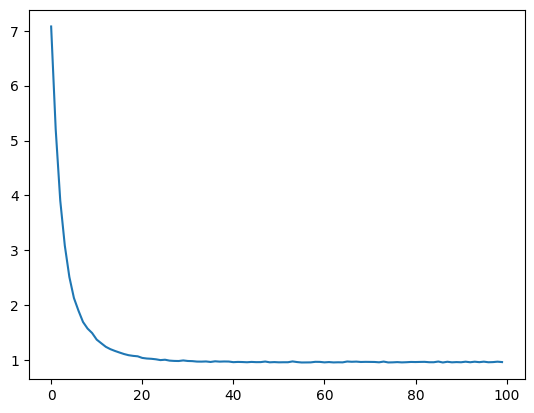

In [ ]:
plt.plot(history)

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([[1.7098]])), ('bias', tensor([-1.1812]))])

In [ ]:
# 나의 beta가 잘 추정되었는가?
model.weight

Parameter containing:
tensor([[1.7098]], requires_grad=True)

In [ ]:
model.bias

Parameter containing:
tensor([-1.1812], requires_grad=True)

2-1> Use `forward = torch.nn.Linear(1, 1, bias=False)` and `bias=torch.tensor(torch.randn([1]), requires_grad=True`. In this case, we define
   ```
yhat = forward(x) + bias
   ```
   Here, you may use `X` instead of `XX` and redefine `trainloader`.

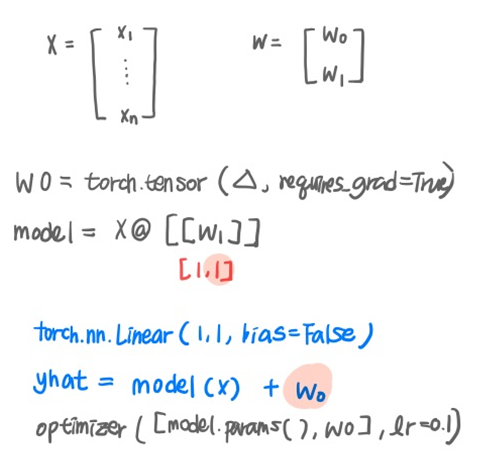

In [ ]:
### 2-1
dataset = TensorDataset(X,Y) # X shape :[n,1]
trainloader = DataLoader(dataset= dataset, batch_size = 5, shuffle = True)

In [ ]:
model = torch.nn.Linear(1,1, bias = False)
W0 = torch.tensor(torch.randn([1]), requires_grad = True) # torch.randn([1]): 1차원인 random number 발생

def loss_ftn(yhat, y):
    return torch.mean((yhat-y)**2)

my_optimizer   = torch.optim.SGD(list(model.parameters()) + [W0],lr = 0.01)
# my_optimizer = torch.optim.SGD([model.weight, W0]            ,lr = 0.01)도 위와 같은 방법
                                                  # 이때 W0도 같이 update!

print(model.state_dict(), W0)

OrderedDict([('weight', tensor([[0.3951]]))]) tensor([-0.3770], requires_grad=True)


<ipython-input-57-107163c3873b>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  W0 = torch.tensor(torch.randn([1]), requires_grad = True) # torch.randn([1]): 1차원인 random number 발생


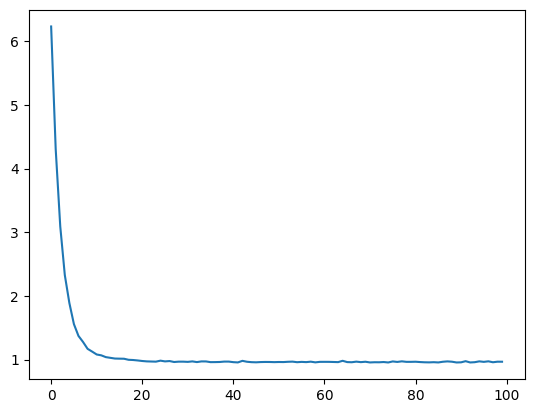

In [ ]:
history = []
epochs = 100
n = len(X)

for _ in range(epochs):
    epoch_loss = 0
    for xx, yy in trainloader:
        yhat = model(xx) + W0 # + W0만 해주면 됨 . 나머지는 위와 동일
        loss = loss_ftn(yhat, yy)
        epoch_loss = epoch_loss + loss * len(yy)

        loss.backward()

        my_optimizer.step()
        my_optimizer.zero_grad()
    history.append(epoch_loss.item()/n)

plt.plot(history)

In [ ]:
# predict
xxx = torch.tensor([3.0])
model(xxx) + W0

tensor([3.9681], grad_fn=<AddBackward0>)

In [ ]:
W = model.weight.T
xxx @ W + W0

tensor([3.9681], grad_fn=<AddBackward0>)


   3> After training, calculate `yhat` corresponding `X=2.0`.



   4> Repeat the above procedures without using `torch.optim.SGD`.

### Exercise 3.1.3



Using `Auto` data set in `ISLP` package, excute the following data processing procedures

- Create the design matrix `X` of shape `[n,2]` where the first column is column of ones and the second column is `horsepower`.

- Standardize `X` and save it into `XX` so that the mean of the second column is zero and the variance of the second column is one.

- Define `Y` as `mpg`.

Now with `XX` (or equivalently `X`) and `Y`, you want to train the following model

```
Yhat = XX @ beta
```
via the following minimization problem
```
torch.mean( (Y-Yhat)**2 )
```
where `beta` is `[2,1]` column parameters. Train the model using the stochastic batch learning with the various instructions. For each problem, you also calculate `Yhat` when `horsepower=2.0`.

1> First method
- Define the loss function
- Use `model = torch.nn.Linear(2,1, bias=False) ` to define the model.
- Use `torch.optim.SGD` to define your optimizer.

2> Second method
- Define the loss function
- Use `model = torch.nn.Linear(1,1, bias=True)` to define the model.
- Do not use `torch.optim.SGD` to do gradient descent.

3> Third method
- Define the loss function
- Use `model = torch.nn.Linear(1,1, bias=False) + beta0` and `beta0 = torch.tensor(torch.randn([1], requires_grad=True)` to define the model.
- Do not use `torch.optim.SGD` to do gradient descent.

4> Fourth method
- Define the loss function
- Use `model = torch.nn.Linear(1,1, bias=False) + beta0` and `beta0 = torch.tensor(torch.randn([1], requires_grad=True)` to define the model.
- Use `torch.optim.SGD` to do gradient descent.




In [ ]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 71.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=05d3f85ede3e9f12114306edec602e83583b0199776926154471186193701af2
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [ ]:
import ISLP

In [ ]:
import torch
import numpy as np

Auto = ISLP.load_data("Auto")

X = torch.tensor(Auto["horsepower"], dtype = torch.float32)
Y = torch.tensor(Auto["mpg"],dtype = torch.float32)

In [ ]:
print(X.shape, Y.shape)

torch.Size([392]) torch.Size([392])


In [ ]:
# X를 정규화
X_mean = torch.mean(X)
X_std = torch.std(X)

In [ ]:
# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [ ]:
XX = (X.reshape([-1,1])-X_mean)/X_std
print(torch.mean(XX)) # 0에 근사
print(torch.std(XX)) # 1에 근사

tensor(-7.2985e-08)
tensor(1.0000)


In [ ]:
n = X.shape[0]
dataset = TensorDataset(X.reshape([-1,1]),Y.reshape([-1,1])) # X shape :[n,1]
trainloader = DataLoader(dataset= dataset, batch_size = 5, shuffle = True)

In [ ]:
model = torch.nn.Linear(1,1, bias = True)

def loss_ftn(yhat, y):
    return torch.mean((yhat-y)**2)
my_optimizer = torch.optim.SGD(model.parameters(), lr = 0.0000001)

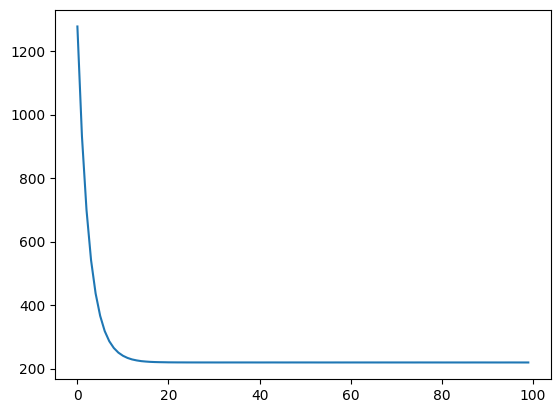

In [ ]:
history = []
epochs = 100
n = len(X)

for i in range(epochs):
    epoch_loss = 0
    for xx, yy in trainloader:
        yhat = model(xx)
        loss = loss_ftn(yhat, yy)
        epoch_loss = epoch_loss + loss * len(yy)

        loss.backward()

        my_optimizer.step()
        my_optimizer.zero_grad()
    history.append(epoch_loss.item()/n)

plt.plot(history)

#### X parameter값이 너무 크면 학습이 잘 이뤄지지 않음.  
이유>
$Loss(yhat,y) = ∑(yhat - y)^2)$  
$\hat{y} = X \cdot\ \beta_1 + \beta_0$  
$diff(\sum(X \cdot\ \beta_1 + \beta_0$  )^2)$ by $\beta_1$

$\hat{\beta_1} = ∑(Xi \cdot\ \beta_1 + \beta_0  ) \cdot Xi $  
즉, X가 너무 크면 추정치가 너무 커지므로 X에 대해 정규화해야함.


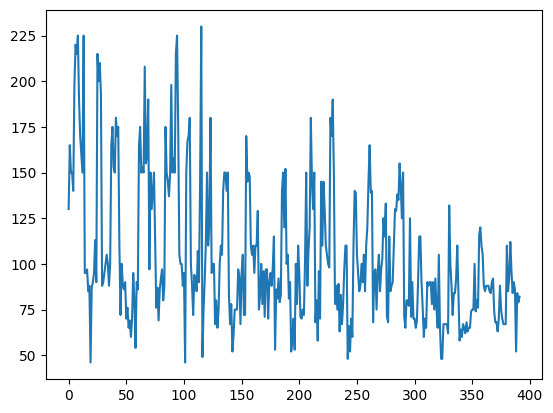

In [ ]:
# X의 변형없이 train을 할 경우 model학습이 잘 안됨.
plt.plot(X)

In [ ]:
model = torch.nn.Linear(1,1, bias = True)


def loss_ftn(yhat, y):
    return torch.mean((yhat-y)**2)

my_optimizer   = torch.optim.SGD(model.parameters(),lr = 0.00000001)

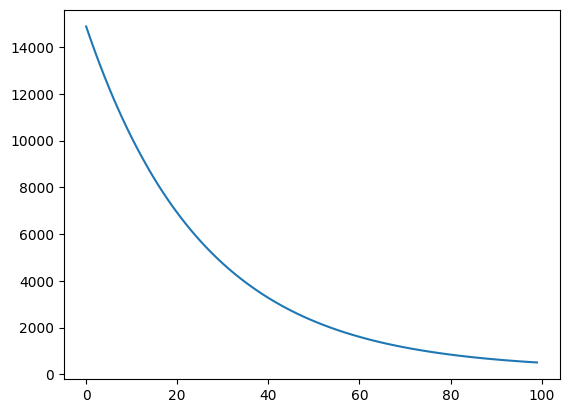

In [ ]:
history = []
epochs = 100
n = X.shape[0]

for _ in range(epochs):
    epoch_loss = 0
    for xx, yy in trainloader:

        yhat = model(xx)
        loss = loss_ftn(yhat, yy)
        epoch_loss = epoch_loss + loss * len(yy)


        loss.backward()

        my_optimizer.step()
        my_optimizer.zero_grad()


    history.append(epoch_loss.item()/n)

plt.plot(history)


#### X를 정규화해서 학습해야 올바르게 됨.

In [ ]:
# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

XX = (X - X.mean())/ X.std()

dataset = TensorDataset(XX.reshape([-1,1]),Y.reshape([-1,1])) # X shape :[n,1]
trainloader = DataLoader(dataset= dataset, batch_size = 5, shuffle = True)

In [ ]:
model = torch.nn.Linear(1,1, bias = True)


def loss_ftn(yhat, y):
    return torch.mean((yhat-y)**2)

my_optimizer   = torch.optim.SGD(model.parameters(),lr = 0.001)

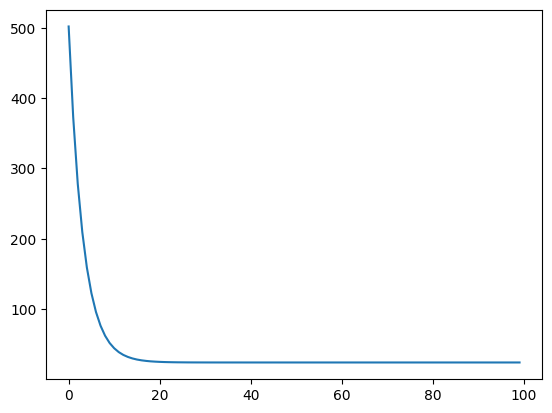

In [ ]:
history = []
epochs = 100
n = X.shape[0]

for _ in range(epochs):
    epoch_loss = 0
    for xx, yy in trainloader:

        yhat = model(xx)
        loss = loss_ftn(yhat, yy)
        epoch_loss = epoch_loss + loss * len(yy)


        loss.backward()

        my_optimizer.step()
        my_optimizer.zero_grad()


    history.append(epoch_loss.item()/n)

plt.plot(history)


In [ ]:
# x = 3.0 predict
# 현재 XX가 정규화되어 있으므로 x값도 정규화 시켜 model에 넣어줘야함.
xxx = torch.tensor([[(3.0 - X.mean())/X.std()]])

model(xxx)

tensor([[39.4160]], grad_fn=<AddmmBackward0>)

In [ ]:
xxx @ model.weight + model.bias

tensor([[39.4160]], grad_fn=<AddBackward0>)

In [ ]:
# horsepower = 17.0인 경우 yhat?
xx = torch.tensor([(17.0-X_mean)/X_std])
model(xx)

tensor([37.2124], grad_fn=<ViewBackward0>)

#4. Custom layer

Repeat the above procedure with user defined layer.

## 4.1. Layers without Parameters

To start, we construct a custom layer that does not have any parameters of its own. The following CenteredLayer class simply subtracts the mean from its input. To build it, we simply need to inherit from the base layer class and implement the forward propagation function.

In [ ]:
class CenteredLayer(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X): # 함수 이름으로 바로 실행이 됨
        return X - X.mean()

Let’s verify that our layer works as intended by feeding some data through it.

In [ ]:
xx = torch.tensor([1.0, 2, 3, 4, 5])
layer = CenteredLayer() # 각각의 값에서 평균을 빼주는 역할
#layer.forward(xx)
layer(xx)

tensor([-2., -1.,  0.,  1.,  2.])

In [ ]:
# model(x): forward 계산
# model.parameters(): parameter 보여줌, step ft과 같이 working
# model.state_dict(): parameter의 이름과 값 보여줌

## 4.2. Layers with Parameters

Now that we know how to define simple layers, let’s move on to defining layers with parameters that can be adjusted through training. We can use built-in functions to create parameters, which provide some basic housekeeping functionality. In particular, they govern access, initialization, sharing, saving, and loading model parameters. This way, among other benefits, we will not need to write custom serialization routines for every custom layer.

Now let’s implement our own version of the `Linear` layer. Recall that this layer requires two parameters, one to represent the weight and the other for the bias. This layer requires two input arguments: `in_units` and `units`, which denote the number of inputs and outputs, respectively.

Mathematically, we have

```
weight = torch.tensor( torch.randn([in_units, units]), requires_grad=True)
```
and
```
bias = torch.tensor( torch.randn([units]), requires_grad=True)
```

Hence, we are aiming to create

`Yhat = X @ W + b`

where `X` is `[n,in_units]` matrix.

However, in `torch.nn.Module`, the following command
```
weight = torch.tensor( torch.randn([in_units, units]), requires_grad=True)
```
should be written as
```
weight = torch.nn.Parameter( torch.randn([in_units, units]))
```

The following is the code how to define `torch.nn.Linear` layer.





In [ ]:
inp1 = 1
inp2 = 1

weight = torch.tensor(torch.randn([inp1,inp2]), requires_grad=True)
bias = torch.tensor(torch.randn([inp2]), requires_grad=True)

Yhat = X @ weight + bias

In [ ]:
class MyLinear(torch.nn.Module):
    ## parameter 정의
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.randn(in_units, units))
        #self.bias = torch.nn.Parameter(torch.randn(units,))
        # model.parameters(), model.state_dict()

    ## parameter optimize
    def forward(self, X):
        temp = X @ self.weight #+ self.bias
        return temp

Now, let's verify that it is working as intended.

In [ ]:
# model = torch.nn.Linear(2,1, bias=False)
# model(XX)
model = MyLinear(2,1)
print(model.weight)
print(model.state_dict())

Parameter containing:
tensor([[0.4472],
        [1.8720]], requires_grad=True)
OrderedDict([('weight', tensor([[0.4472],
        [1.8720]])), ('bias', tensor([0.5856]))])


In [ ]:
model(torch.tensor([[1.0, 2.0]]))

tensor([[4.7767]], grad_fn=<AddBackward0>)

In [ ]:
# cf) bias=True
class MyLinear(torch.nn.Module):
    ## parameter 정의
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.randn(in_units, units))
        self.bias = torch.nn.Parameter(torch.randn(units,))
    ## parameter optimize
    def forward(self, X):
        temp = X @ self.weight + self.bias
        return temp

# model = torch.nn.Linear(1,1, bias=True)
# model(X)
model = MyLinear(1,1)
print(model.weight)
print(model.state_dict())

Parameter containing:
tensor([[0.0709]], requires_grad=True)
OrderedDict([('weight', tensor([[0.0709]])), ('bias', tensor([-1.4037]))])


## 4.2.1 Using torch.nn module to construct and train the model.

In [ ]:
class linear_regression(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.bias = torch.nn.Parameter(torch.randn([output_size]))
    self.weight = torch.nn.Parameter(torch.randn([input_size,output_size]))
  def forward(self,x):
    yhat = x @ self.weight + self.bias
    return yhat

model = linear_regression(2,1)

Note that the above can be equivalently written as follows. In this case, try

```
class linear_regression(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.model_1 = torch.nn.Linear(input_size, output_size, bias=False)
    self.bias = torch.nn.Parameter(torch.randn([output_size]))
  def forward(self,x):
    yhat = self.model_1(x) + self.bias
    return yhat

model = linear_regression(2,1)
```

Here, try `model.state_dict()` in each definition. Can you see the difference in parameter names?

In [ ]:
model.state_dict()

OrderedDict([('bias', tensor([-0.1966])),
             ('weight', tensor([[-0.1380],
                      [-1.5657]]))])

In [ ]:
dataset = TensorDataset(XX,Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [ ]:
iters = 30
history = []
for epoch in range(iters):
  current_epoch_loss = 0
  for x,y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    current_epoch_loss += loss.item()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  history.append(current_epoch_loss)

RuntimeError: ignored

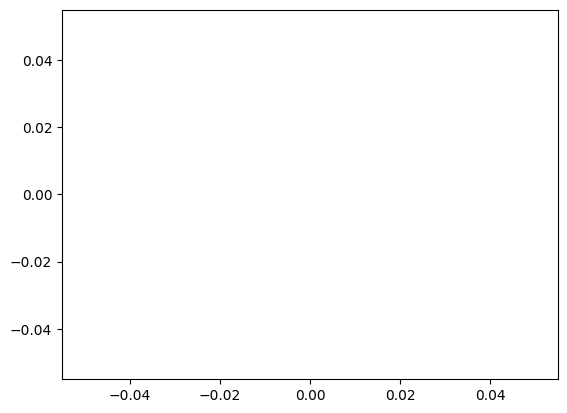

In [ ]:
plt.plot(history)

## Exercise 4.2.2:

Visit `Auto` exercise using custom layer.